In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
from fuzzywuzzy import process, fuzz
import recordlinkage
from datetime import datetime, date

In [28]:
banking = pd.read_csv('/Users/joseservin/DataCamp/Courses/Cleaning_Data/banking_dirty.csv')
banking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        100 non-null    int64  
 1   cust_id           100 non-null    object 
 2   birth_date        100 non-null    object 
 3   Age               100 non-null    int64  
 4   acct_amount       100 non-null    float64
 5   inv_amount        100 non-null    int64  
 6   fund_A            100 non-null    float64
 7   fund_B            100 non-null    float64
 8   fund_C            100 non-null    float64
 9   fund_D            100 non-null    float64
 10  account_opened    100 non-null    object 
 11  last_transaction  100 non-null    object 
dtypes: float64(5), int64(3), object(4)
memory usage: 9.5+ KB


In [29]:
banking.head()

,Unnamed: 0,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
0,0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,02-09-18,22-02-19
1,1,166B05B0,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,28-02-19,31-10-18
2,2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,25-04-18,02-04-18
3,3,F2158F66,1985-11-03,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,07-11-17,08-11-18
4,4,7A73F334,1990-05-17,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,14-05-18,19-07-18


In [30]:
banking.isna().sum()

Unnamed: 0          0
cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
dtype: int64

In [31]:
columns = ['account_opened','last_transaction','birth_date']

for col in columns:
    banking[col] = ([pd.to_datetime(row) for row in banking[col]])

In [32]:
# banking['account_opened'] = ([pd.to_datetime(i) for i in banking['account_opened']])

In [33]:
banking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        100 non-null    int64         
 1   cust_id           100 non-null    object        
 2   birth_date        100 non-null    datetime64[ns]
 3   Age               100 non-null    int64         
 4   acct_amount       100 non-null    float64       
 5   inv_amount        100 non-null    int64         
 6   fund_A            100 non-null    float64       
 7   fund_B            100 non-null    float64       
 8   fund_C            100 non-null    float64       
 9   fund_D            100 non-null    float64       
 10  account_opened    100 non-null    datetime64[ns]
 11  last_transaction  100 non-null    datetime64[ns]
dtypes: datetime64[ns](3), float64(5), int64(3), object(1)
memory usage: 9.5+ KB


In [34]:
banking.describe(include='all')

/var/folders/77/ysxyzr2j3zdb588cls576tc00000gn/T/ipykernel_17361/3509577850.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  banking.describe(include='all')
/var/folders/77/ysxyzr2j3zdb588cls576tc00000gn/T/ipykernel_17361/3509577850.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  banking.describe(include='all')
/var/folders/77/ysxyzr2j3zdb588cls576tc00000gn/T/ipykernel_17361/3509577850.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to s

,Unnamed: 0,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
count,100.000000,100,100,100.000000,1.000000e+02,100.000000,100.000000,100.00000,100.00000,100.00000,100,100
unique,NaN,100,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93,94
top,NaN,870A9281,1975-06-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-18 00:00:00,2018-02-04 00:00:00
freq,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
first,NaN,NaN,1961-06-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-08 00:00:00,2018-02-04 00:00:00
last,NaN,NaN,1993-10-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-02 00:00:00,2020-10-02 00:00:00
mean,49.500000,NaN,NaN,43.170000,3.027560e+06,46006.300000,11474.067600,11824.45330,11901.84080,10971.52570,NaN,NaN
std,29.011492,NaN,NaN,10.120541,2.104214e+07,26526.791616,12432.069917,11081.38577,14084.34211,9487.15002,NaN,NaN
min,0.000000,NaN,NaN,27.000000,1.220984e+04,3214.000000,41.000000,312.00000,67.00000,118.00000,NaN,NaN
25%,24.750000,NaN,NaN,34.000000,5.921813e+04,23524.250000,2317.000000,3387.50000,2272.25000,4044.75000,NaN,NaN


# Univariate Analysis

In [35]:
banking

,Unnamed: 0,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
0,0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,2018-02-09,2019-02-22
1,1,166B05B0,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,2019-02-28,2018-10-31
2,2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,2018-04-25,2018-02-04
3,3,F2158F66,1985-11-03,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,2017-07-11,2018-08-11
4,4,7A73F334,1990-05-17,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,2018-05-14,2018-07-19
...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,CA507BA1,1974-08-10,46,12209.84,7515,190.0,931.0,1451.0,4943.0,2018-05-26,2019-11-09
96,96,B99CD662,1989-12-12,31,92838.44,49089,2453.0,7892.0,31486.0,7258.0,2017-04-05,2019-12-03
97,97,13770971,1984-11-29,36,92750.87,27962,3352.0,7547.0,8486.0,8577.0,2017-08-16,2019-04-24
98,98,93E78DA3,1969-12-14,51,41942.23,29662,1758.0,11174.0,11650.0,5080.0,2017-09-10,2018-04-15


In [37]:
banking['Age'].min()

27

In [38]:
banking['Age'].max()

63

<AxesSubplot:>

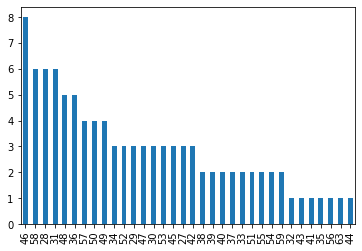

In [36]:
banking['Age'].value_counts().plot(kind='bar')

# creating Age groups to explore more uni-variate analysis

In [42]:
count_map = {"20's":0, "30's":0, "40's":0, "50's":0, "60's":0}

for entry in banking['Age']:
    if 20 <= entry <= 29:
        count_map["20's"] += 1
    elif 30 <= entry <= 39:
        count_map["30's"] += 1
    elif 40<= entry <= 49:
        count_map["40's"] += 1
    elif 50<= entry <= 59:
        count_map["50's"] += 1
    else:
        count_map["60's"] += 1
count_map

{"20's": 12, "30's": 27, "40's": 31, "50's": 29, "60's": 1}

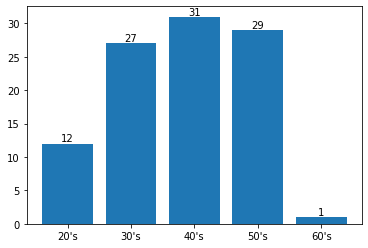

In [55]:
lists = sorted(count_map.items())
x,y = zip(*lists)
plt.bar(x,y,)
for i,j in zip(x,y):

    label = "{:.0f}".format(j)

    plt.annotate(label, # this is the text
                 (i,j), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()

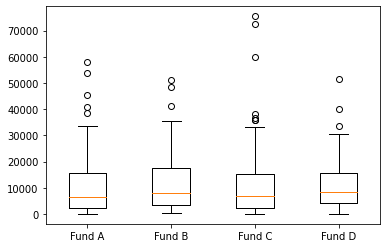

In [63]:
fig, ax = plt.subplots()

ax.boxplot([banking['fund_A'], banking['fund_B'], banking['fund_C'], banking['fund_D']])
ax.set_xticklabels(['Fund A','Fund B','Fund C','Fund D'])

plt.show()

/Users/joseservin/DataCamp/venv/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


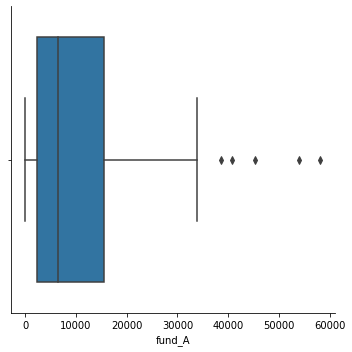

In [68]:
sns.factorplot(
    data= banking,
    x='fund_A',
    kind = 'box'
)